**ensemble de données boursières AAPL (Apple Inc.)**

In [1]:
import pandas as pd
from scipy import integrate
import numpy as np
import scipy.stats as stats
import time
import matplotlib.pyplot as plt
import seaborn as sns

Exploration initiale des données

In [21]:
df = pd.read_csv('Apple Stock Prices (1981 to 2023).csv')

In [22]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02/01/1981,0.154018,0.155134,0.154018,0.154018,0.119849,21660800
1,05/01/1981,0.151228,0.151228,0.150670,0.150670,0.117244,35728000
2,06/01/1981,0.144531,0.144531,0.143973,0.143973,0.112032,45158400
3,07/01/1981,0.138393,0.138393,0.137835,0.137835,0.107256,55686400
4,08/01/1981,0.135603,0.135603,0.135045,0.135045,0.105085,39827200


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10608 non-null  object 
 1   Open       10608 non-null  float64
 2   High       10608 non-null  float64
 3   Low        10608 non-null  float64
 4   Close      10608 non-null  float64
 5   Adj Close  10608 non-null  float64
 6   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 580.3+ KB


Aide :
# Imputing missing values based on data distribution, data type, and relevance
# For numerical columns
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)
# For categorical columns
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [24]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10608.000000,10608.000000,10608.000000,10608.000000,10608.000000,1.060800e+04
mean,16.689173,16.879955,16.500822,16.697362,16.027345,3.275098e+08
std,35.450519,35.882848,35.031289,35.473912,35.154878,3.378203e+08
min,0.049665,0.049665,0.049107,0.049107,0.038213,0.000000e+00
25%,0.287946,0.296875,0.282355,0.288923,0.238909,1.213044e+08
50%,0.488839,0.495536,0.480446,0.487701,0.404851,2.145976e+08
75%,16.320893,16.418483,16.151249,16.269554,14.073167,4.066804e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,7.421641e+09


In [25]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [51]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-01-02,0.154018,0.155134,0.154018,0.154018,0.119849,21660800
1981-01-05,0.151228,0.151228,0.150670,0.150670,0.117244,35728000
1981-01-06,0.144531,0.144531,0.143973,0.143973,0.112032,45158400
1981-01-07,0.138393,0.138393,0.137835,0.137835,0.107256,55686400
1981-01-08,0.135603,0.135603,0.135045,0.135045,0.105085,39827200


 Tracer les cours de clôture et le volume échangé au fil du temps.

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# Set the 'Date' column as the index
df = df.set_index('Date')
# Resample the data to a daily frequency, filling missing values with the previous day's data
df_daily = df.resample('D').ffill()
print(df_daily.head())
# Plot the data
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Prices Over Time')
plt.legend()
plt.show()

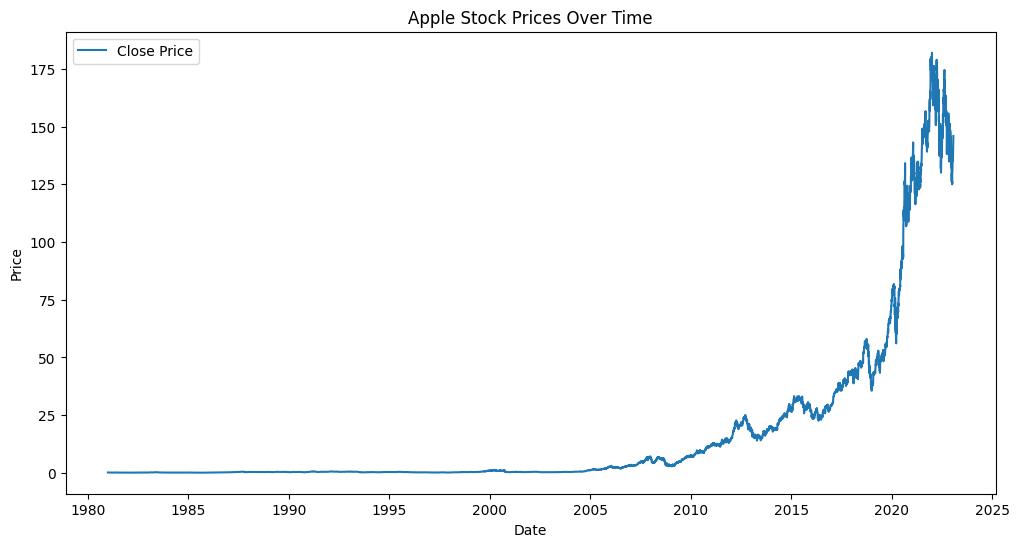

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Prices Over Time')
plt.legend()
plt.show()

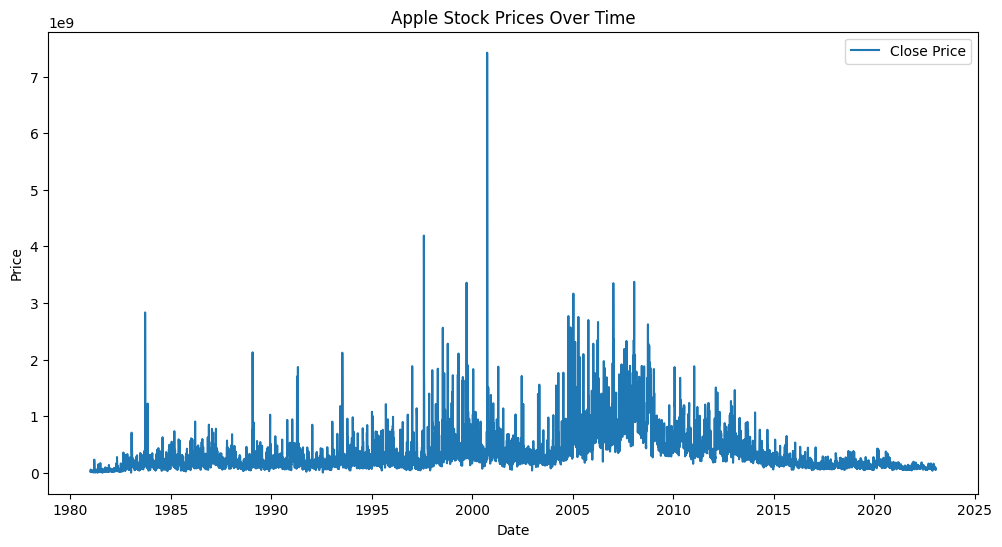

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Prices Over Time')
plt.legend()
plt.show()

c:\Users\rickia\AppData\Local\Programs\Python\Python313\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


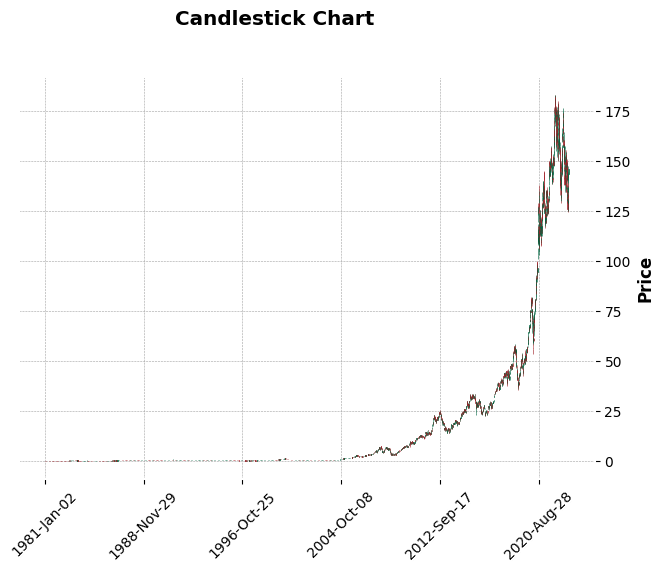

In [78]:
# Create a candlestick chart to depict high and low prices.

!pip install mplfinance
import mplfinance as mpf

mpf.plot(df, type='candle', style='charles', volume=False, title="Candlestick Chart", ylabel='Price')

Analyse statistique

In [56]:
import scipy.stats as stats

In [76]:
summary_stats = df[['Open','Close', 'Volume']].describe()
# Print the summary statistics
print(summary_stats)

               Open         Close        Volume
count  10608.000000  10608.000000  1.060800e+04
mean      16.689173     16.697362  3.275098e+08
std       35.450519     35.473912  3.378203e+08
min        0.049665      0.049107  0.000000e+00
25%        0.287946      0.288923  1.213044e+08
50%        0.488839      0.487701  2.145976e+08
75%       16.320893     16.269554  4.066804e+08
max      182.630005    182.009995  7.421641e+09


In [ ]:
# columns = df[['Open', 'Close', 'Volume']]

# for i in columns:
#   mean[i] = stats.tmean()
#   return

Analyze closing prices with a moving average.

In [ ]:
# Analyze closing prices with a moving average.
dix = df['Close'].rolling(window=10).mean()  # 10-day MA
cinq = df['Close'].rolling(window=50).mean()  # 50-day MA (longer trend)

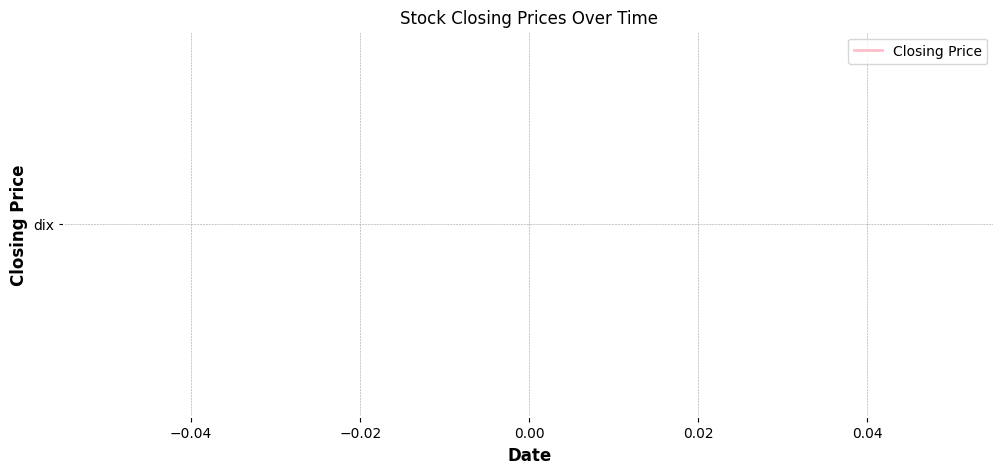

In [83]:
plt.figure(figsize=(12, 5))
plt.plot('dix', label='Closing Price', color='pink')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Closing Prices Over Time')
plt.legend()
plt.show()

In [92]:
median_volume = df['Volume'].median()         #seule variable à changer
group1 = df[df['Volume'] >= median_volume]['Close']
group2 = df[df['Volume'] < median_volume]['Close']

# Perform t-test
t_stat, p_value = stats.ttest_ind(group1, group2, nan_policy='omit')

print(f"T-statistic: {t_stat}, \n P-value: {p_value}")

T-statistic: -32.59104318990644, 
 P-value: 3.9140760064440366e-222


Examine daily returns’ distribution and test for normality using SciPy.--> ???

In [93]:
#  Define the window size for moving averages
window_size = 15

# Calculate the moving average of the 'Close' prices using np.convolve
moving_avg_close = np.convolve(df['Close'].dropna(), np.ones(window_size)/window_size, mode='valid')

# Print the moving averages (optional)
print("Moving Average of Close prices:", moving_avg_close)

Moving Average of Close prices: [  0.14244793   0.14192707   0.1414806  ... 134.22199973 135.39533347
 136.7893332 ]


Analyze correlations between moving averages of closing prices and trading volume across time periods.

In [107]:
# Ensure only numeric columns are used for correlation
selected_columns = ['Volume', 'Close']
numeric_data = df[selected_columns].select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

In [97]:
correlation_matrix

,volume,vwap,open,close,high,low,time,transactions
volume,1.000000,-0.517427,-0.517256,-0.517412,-0.516252,-0.518592,-0.752166,-0.208484
vwap,-0.517427,1.000000,0.999899,0.999955,0.999960,0.999960,0.856282,0.773481
open,-0.517256,0.999899,1.000000,0.999779,0.999913,0.999894,0.856183,0.774800
close,-0.517412,0.999955,0.999779,1.000000,0.999895,0.999898,0.856228,0.773152
high,-0.516252,0.999960,0.999913,0.999895,1.000000,0.999873,0.855994,0.777224
low,-0.518592,0.999960,0.999894,0.999898,0.999873,1.000000,0.856505,0.770126
time,-0.752166,0.856282,0.856183,0.856228,0.855994,0.856505,1.000000,0.620289
transactions,-0.208484,0.773481,0.774800,0.773152,0.777224,0.770126,0.620289,1.000000


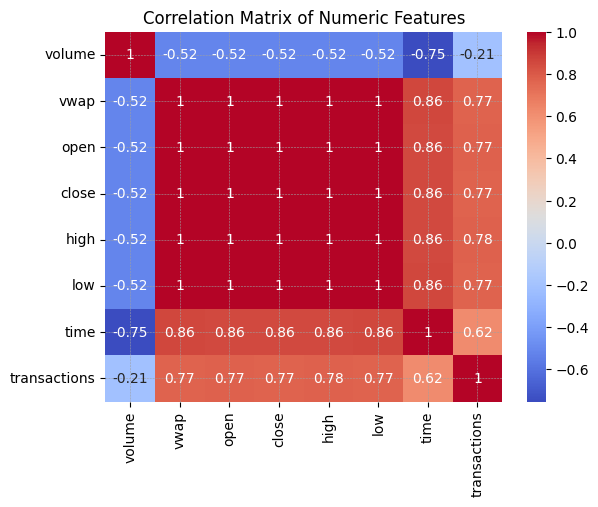

In [98]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [96]:

# Calculate the correlation between moving averages of Close prices and Volume
correlation_matrix = np.corrcoef(moving_avg_close, moving_avg_volume)
print(f"Correlation between Moving Averages of Close and Volume: {correlation_matrix[0, 1]}")

NameError: name 'moving_avg_volume' is not defined